# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Example

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  1e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.8750000000000182


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Example

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.499999989554308


# Portfolio optimization

In [14]:
import matplotlib.pyplot as plt
from utils import *

dataPath = "./data/Bundle1"

stock_data = readData(dataPath)

## Predictions

In [15]:
stock_data, confidences = getPredictions(stock_data)

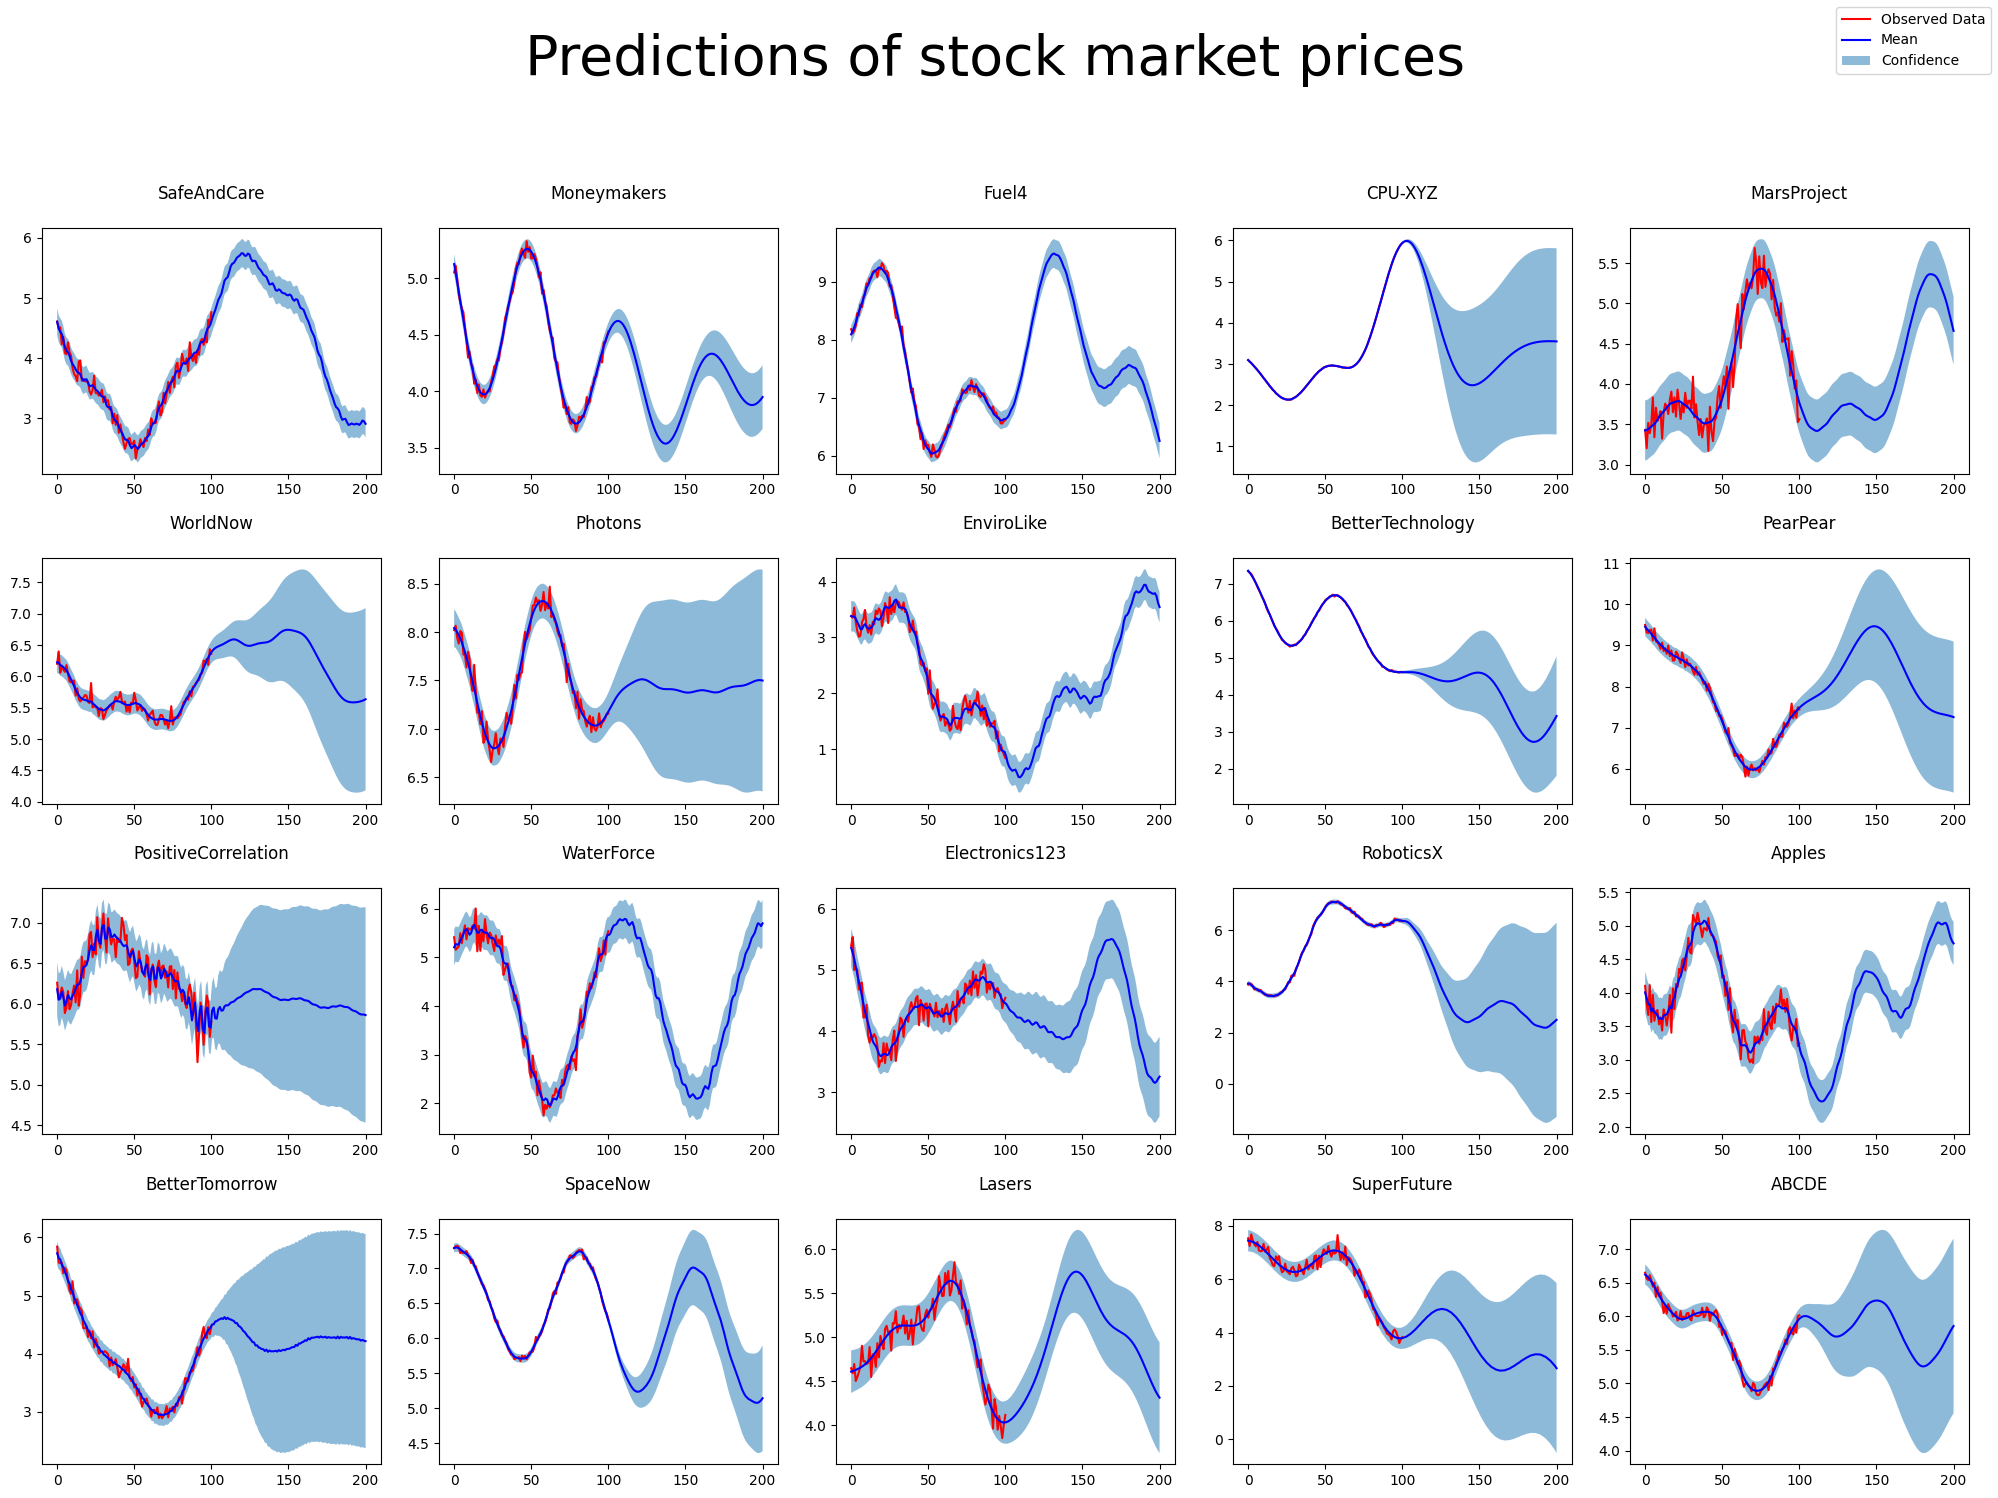

In [16]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
fig.tight_layout(h_pad=5)
plt.subplots_adjust(top=0.85)
for company_idx, company in enumerate(stock_data):
    x = torch.Tensor(company.datax)
    y = torch.Tensor(company.datay)

    row = company_idx // 5
    col = company_idx - row * 5

    axes[row, col].set_title(company.name)
    axes[row, col].plot(x.numpy(), y.numpy(), 'r-')

    axes[row, col].plot(company.pred_datax, company.pred_datay, 'b')
    axes[row, col].fill_between(company.pred_datax, confidences[company.name][0], confidences[company.name][1], alpha=0.5)
fig.suptitle("Predictions of stock market prices", fontsize = 40)
fig.legend(['Observed Data', 'Mean', 'Confidence'], loc='upper right')
plt.show()

In [17]:
risk_matrix = getRiskMatrix(stock_data)
company_names = [company.name for company in stock_data]

## Model

$
\begin{cases}
\displaystyle max \sum_{i=1}^n w_ir_i \\
\displaystyle min \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i \\
\end{cases}
$ <br>

$ \displaystyle \sum_{i=1}^n w_i = 1 $ <br>
$ \displaystyle w_i \in [0,1] \ \forall_{i}$ <br>

## Weighted Sum Method

$ \displaystyle min f_{s} = - w_{1}^{\star} \sum_{i=1}^n w_ir_i + w_{2}^{\star} \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>

In [18]:
def WSM(weights, norm_return = 1.0, norm_risk = 1.0):
    Q = 2.0 / norm_risk * matrix([[weights[0] * risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([-weights[1] * float(i.increase) / norm_return for i in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    return solvers.qp(Q, c, G, h, A, b)

### Solution when only risk matters

In [19]:
weights = [1.0, 0.0]
solLP = WSM(weights)

weights = list(solLP['x'])
result_risk = [
    sum([float(stock_data[i].increase) * weights[i] for i in range(len(stock_data))]),
    sum([sum(risk_matrix[i]) * weights[i] for i in range(len(stock_data))]),
]

print(weights)
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.2439e-03 -1.0325e+00  1e+00  2e-16  5e+00
 1:  3.7472e-03 -2.2798e-02  3e-02  5e-17  1e-01
 2:  1.4874e-03 -4.1056e-03  6e-03  2e-16  1e-02
 3:  8.1700e-04 -7.1015e-05  9e-04  2e-16  1e-03
 4:  6.5375e-04  4.7811e-04  2e-04  7e-17  2e-16
 5:  6.1755e-04  5.9336e-04  2e-05  6e-17  3e-16
 6:  6.0767e-04  6.0605e-04  2e-06  1e-16  4e-16
 7:  6.0684e-04  6.0681e-04  3e-08  9e-17  3e-16
Optimal solution found.
[5.683691633560873e-07, 0.04027246446300831, 0.25326754984591615, 0.08948786465370998, 0.023326641691229826, 8.362521963715841e-05, 0.05725724976374222, 0.05890458062471655, 1.8161563038085296e-05, 0.014038911750994164, 0.01280803661062004, 5.305266544773967e-06, 2.57055297865426e-07, 0.21065956580010445, 0.019841869837939598, 1.620908700349396e-06, 0.02959596987724621, 0.09027264125552231, 6.469203910331574e-06, 0.10015064623895825]
0.0006068407265176184


### Solution when only return matters

In [20]:
weights = [0.0, 1.0]
solLP = WSM(weights)

weights = list(solLP['x'])
result_return = [
    sum([float(stock_data[i].increase) * weights[i] for i in range(len(stock_data))]),
    sum([sum(risk_matrix[i]) * weights[i] for i in range(len(stock_data))]),
]

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -1.1694e+01 -4.2270e+00  1e+02  7e+00  6e+00
 1: -1.3782e+00 -4.0576e+00  3e+00  8e-15  1e-15
 2: -3.1769e+00 -3.4381e+00  3e-01  2e-16  1e-15
 3: -3.2263e+00 -3.2291e+00  3e-03  1e-16  7e-16
 4: -3.2269e+00 -3.2270e+00  3e-05  3e-16  6e-16
 5: -3.2270e+00 -3.2270e+00  3e-07  3e-16  7e-16
Optimal solution found.
[ 1.34e-09]
[ 1.05e-09]
[ 9.69e-10]
[ 1.36e-09]
[ 6.96e-10]
[ 1.03e-09]
[ 8.70e-10]
[ 1.00e+00]
[ 1.19e-09]
[ 9.39e-10]
[ 9.01e-10]
[ 8.87e-10]
[ 1.22e-09]
[ 1.59e-09]
[ 6.88e-10]
[ 9.71e-10]
[ 1.10e-09]
[ 8.69e-10]
[ 1.24e-09]
[ 9.40e-10]

-3.2269524383472494


### Pareto fronts

In [21]:
norm_return = result_risk[0] - result_return[0]
norm_risk = result_return[1] - result_risk[1]

pareto_fronts_wsm = dict()
for splits in [10, 100, 200, 500, 1000]:
    weight_vector = []
    factor = 1.0 / splits
    value = 0.0
    for i in range(int(splits) + 1):
        weight_vector.append([value, round(1.0 - value, 3)])
        value = round(value + factor, 3)

    result=[]
    for weights in weight_vector:
        solLP = WSM(weights)

        f = list(solLP['x'])
        result.append([
            sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
            sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
        ])

        print("Weights:", weights)
        print(solLP['primal objective'])
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])
    pareto_fronts_wsm[splits] = (x, y)

     pcost       dcost       gap    pres   dres
 0: -1.1694e+01 -4.2270e+00  1e+02  7e+00  6e+00
 1: -1.3782e+00 -4.0576e+00  3e+00  8e-15  1e-15
 2: -3.1769e+00 -3.4381e+00  3e-01  2e-16  1e-15
 3: -3.2263e+00 -3.2291e+00  3e-03  1e-16  7e-16
 4: -3.2269e+00 -3.2270e+00  3e-05  3e-16  6e-16
 5: -3.2270e+00 -3.2270e+00  3e-07  3e-16  7e-16
Optimal solution found.
Weights: [0.0, 1.0]
-3.2269524383472494
     pcost       dcost       gap    pres   dres
 0: -8.0675e+00 -3.9260e+00  1e+02  6e+00  5e+00
 1: -1.6125e+00 -3.5483e+00  3e+00  5e-02  4e-02
 2: -2.6337e+00 -2.8307e+00  2e-01  4e-03  3e-03
 3: -2.8213e+00 -2.8233e+00  2e-03  4e-05  3e-05
 4: -2.8232e+00 -2.8232e+00  2e-05  4e-07  3e-07
 5: -2.8232e+00 -2.8232e+00  2e-07  4e-09  3e-09
Optimal solution found.
Weights: [0.1, 0.9]
-2.823241032902656
     pcost       dcost       gap    pres   dres
 0: -5.9713e+00 -3.5001e+00  9e+01  6e+00  5e+00
 1: -1.2668e+00 -3.1579e+00  2e+00  4e-02  3e-02
 2: -2.2014e+00 -2.4277e+00  3e-01  3e-03  

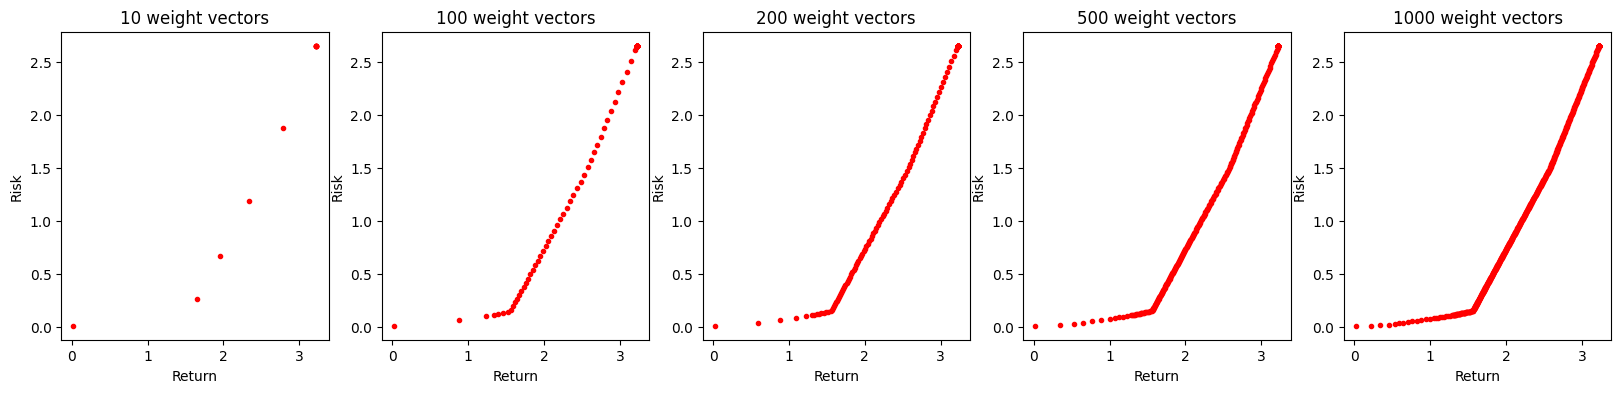

In [22]:
splits_list = list(pareto_fronts_wsm.keys())

fig, axes = plt.subplots(1, len(pareto_fronts_wsm), figsize=(20, 4))
for i, ax in enumerate(fig.axes):
    splits = splits_list[i]
    x, y = pareto_fronts_wsm[splits]
    
    ax.plot(x, y, '.r')
    ax.set_title(f"{int(splits)} weight vectors")
    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
plt.show()

In [23]:
import csv

def writeParetoFront(x, y, outputPath):
    with open(outputPath, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(zip(["x"] + x, ["y"] + y))

In [24]:
x, y = pareto_fronts_wsm[100]
outputPath = "./pareto_fronts/WSM_100.csv"
writeParetoFront(x, y, outputPath)

## Epsilon-constrained method

$ \displaystyle min  f_{risk} = \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>
$ s.t. $ <br>
$ \displaystyle \sum_{i=1}^n w_ir_i \geq return $ <br>
$ ... $

In [25]:
def ECM(epsilon):
    Q = 2.0 * matrix([[risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([0.0 for _ in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] + [-stock_data[i].increase] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data] + [-epsilon])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    return solvers.qp(Q, c, G, h, A, b)

### Solution with return greater than zero

In [26]:
epsilon = 0.0
solLP = ECM(epsilon)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.3151e-03 -1.0395e+00  1e+00  3e-17  6e+00
 1:  3.7985e-03 -2.4310e-02  3e-02  3e-16  2e-01
 2:  1.5871e-03 -3.6069e-03  5e-03  4e-17  2e-02
 3:  8.0185e-04  1.3061e-05  8e-04  2e-16  7e-04
 4:  6.4665e-04  4.8416e-04  2e-04  2e-16  4e-16
 5:  6.1791e-04  5.9170e-04  3e-05  1e-16  4e-16
 6:  6.0768e-04  6.0594e-04  2e-06  1e-16  2e-16
 7:  6.0684e-04  6.0681e-04  3e-08  2e-16  2e-16
Optimal solution found.
[ 5.92e-07]
[ 4.03e-02]
[ 2.53e-01]
[ 8.95e-02]
[ 2.33e-02]
[ 7.87e-05]
[ 5.73e-02]
[ 5.89e-02]
[ 1.78e-05]
[ 1.40e-02]
[ 1.28e-02]
[ 6.04e-06]
[ 2.64e-07]
[ 2.11e-01]
[ 1.98e-02]
[ 1.63e-06]
[ 2.96e-02]
[ 9.03e-02]
[ 6.47e-06]
[ 1.00e-01]

0.000606840432545071


### Pareto fronts

In [27]:
max_return = result_return[0]
solutions = dict()
pareto_fronts_ecm = dict()
for threshold in [10, 20, 100, 1000]:
    result=[]
    for epsilon in np.linspace(0.0, max_return, threshold):
        try:
            solLP = ECM(epsilon)
            
            f = list(solLP['x'])
            objective = solLP['primal objective']
            coordinates = [
                sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
            ]
            # Save results for the Portfolio game
            if threshold == 1000:
                company_weights = dict(zip(company_names, f))
                solutions[epsilon] = (company_weights, objective, coordinates)
            
            result.append(coordinates)
            
            print("Epsilon:", epsilon)
            print(objective)
        except:
            pass
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])
    pareto_fronts_ecm[threshold] = (x, y)

     pcost       dcost       gap    pres   dres
 0:  4.3151e-03 -1.0395e+00  1e+00  3e-17  6e+00
 1:  3.7985e-03 -2.4310e-02  3e-02  3e-16  2e-01
 2:  1.5871e-03 -3.6069e-03  5e-03  4e-17  2e-02
 3:  8.0185e-04  1.3061e-05  8e-04  2e-16  7e-04
 4:  6.4665e-04  4.8416e-04  2e-04  2e-16  4e-16
 5:  6.1791e-04  5.9170e-04  3e-05  1e-16  4e-16
 6:  6.0768e-04  6.0594e-04  2e-06  1e-16  2e-16
 7:  6.0684e-04  6.0681e-04  3e-08  2e-16  2e-16
Optimal solution found.
Epsilon: 0.0
0.000606840432545071
     pcost       dcost       gap    pres   dres
 0:  4.5504e-03 -1.0136e+00  2e+01  5e+00  7e+00
 1:  1.9532e-02 -9.3236e-01  1e+00  1e-01  2e-01
 2:  1.1990e-02 -1.0988e-01  1e-01  2e-16  1e-15
 3:  5.9224e-03 -8.3802e-03  1e-02  1e-16  2e-16
 4:  1.5816e-03 -8.5724e-03  1e-02  4e-16  2e-16
 5:  1.2178e-03 -8.8307e-05  1e-03  1e-16  1e-16
 6:  9.9098e-04  8.5930e-04  1e-04  7e-17  2e-16
 7:  9.2736e-04  8.9644e-04  3e-05  1e-16  2e-16
 8:  9.1461e-04  9.1319e-04  1e-06  2e-16  2e-16
 9:  9.1366e-

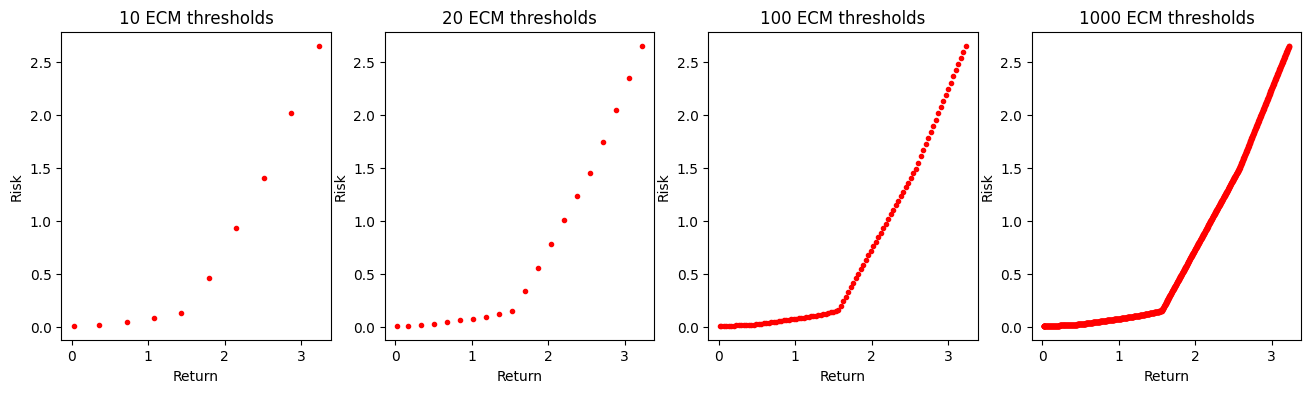

In [28]:
thresholds_list = list(pareto_fronts_ecm.keys())

fig, axes = plt.subplots(1, len(pareto_fronts_ecm), figsize=(16, 4))
for i, ax in enumerate(fig.axes):
    threshold = thresholds_list[i]
    x, y = pareto_fronts_ecm[threshold]

    ax.plot(x, y, '.r')
    ax.set_title(f"{int(threshold)} ECM thresholds")
    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
plt.show()

In [29]:
x, y = pareto_fronts_ecm[100]
outputPath = "./pareto_fronts/ECM_100.csv"
writeParetoFront(x, y, outputPath)

## Portfolio game

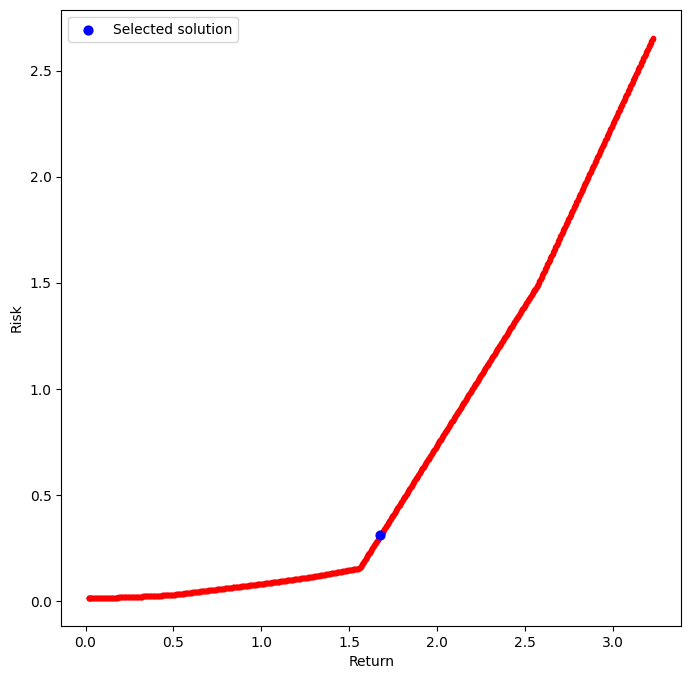

In [30]:
# Calculate relative risk differences between a solution and a previous one
epsilons = list(solutions.keys())
risks = [i for i in range(100)]

deltas = [0]
for idx, epsilon in enumerate(epsilons[1:]):
    previous_risk = solutions[epsilons[idx]][1]
    current_risk = solutions[epsilon][1]
    deltas.append((current_risk - previous_risk) / current_risk)
# Select the solution right before the risk soar 
selected_idx = np.argmax(deltas) - 1
selected_epsilon = epsilons[selected_idx]
selected_weights = solutions[selected_epsilon][0]
selected_x, selected_y = solutions[selected_epsilon][2]

# Plot the Pareto front
x=[]
y=[]
for epsilon, values, in solutions.items():
    x.append(values[2][0])
    y.append(values[2][1])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x=selected_x, y=selected_y, c='b', s=40, label='Selected solution')
ax.plot(x, y, '.r', zorder=0)
ax.set_xlabel('Return')
ax.set_ylabel('Risk')
plt.legend()
plt.show()

In [31]:
# Write down the selected solution
def writePotrfolioWeights(total_return, total_risk, weights, outputPath):
    order = ["SuperFuture", "Apples", "WorldNow", "Electronics123", "Photons", "SpaceNow", "PearPear", "PositiveCorrelation", "BetterTechnology", "ABCDE", "EnviroLike", "Moneymakers", "Fuel4", "MarsProject", "CPU-XYZ", "RoboticsX", "Lasers", "WaterForce", "SafeAndCare","BetterTomorrow"]
    output = ["{:.6f}".format(weights[company_name]) for company_name in company_names]
    assert sum([float(i) for i in output]) == 1.0
    output = [str(total_return), str(total_risk)] + output
    with open(outputPath, "w") as f:
        f.write(' '.join(output))
    print(output)

outputPath = "./portfolio/lab1.txt"
writePotrfolioWeights(selected_x, selected_y, selected_weights, outputPath)

['1.6764647962557053', '0.30867811405625273', '0.000000', '0.000000', '0.000000', '0.144458', '0.157036', '0.000000', '0.000000', '0.550450', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.148056', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000']
